In [1]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_sales = pd.read_csv("../data/processed/monthly_sales_trends.csv", parse_dates=["order_date"])
monthly_sales.head()

,order_date,sales,rolling_3_month_avg,mom_growth_pct
0,2014-01-31,6242.525,NaN,NaN
1,2014-02-28,1839.658,NaN,-70.530226
2,2014-03-31,14573.956,7552.046333,692.210074
3,2014-04-30,7944.837,8119.483667,-45.486064
4,2014-05-31,6912.787,9810.526667,-12.990197


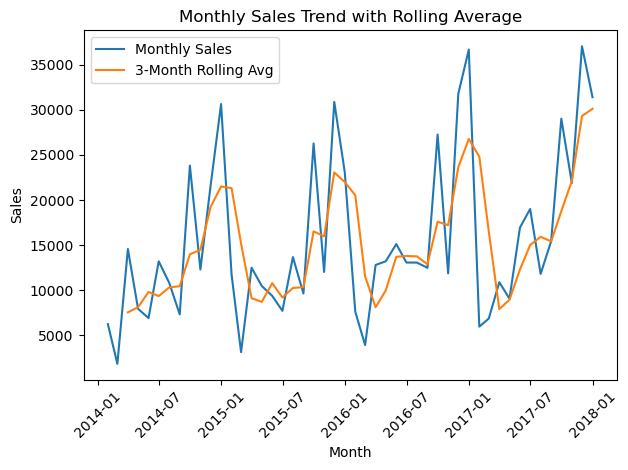

In [2]:
plt.figure()
plt.plot(monthly_sales["order_date"], monthly_sales["sales"], label="Monthly Sales")
plt.plot(monthly_sales["order_date"], monthly_sales["rolling_3_month_avg"], label="3-Month Rolling Avg")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend with Rolling Average")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
last_6_months_avg = monthly_sales["sales"].tail(6).mean()
next_month_forecast = round(last_6_months_avg, 2)
next_month_forecast


24438.56

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
monthly_sales["month_index"] = np.arange(len(monthly_sales))
X = monthly_sales[["month_index"]]
y = monthly_sales["sales"]

# Train linear regression
model = LinearRegression()
model.fit(X, y)

# Predict next month
next_month_index = np.array([[len(monthly_sales)]])
predicted_sales = round(model.predict(next_month_index)[0], 2)
predicted_sales


c:\Users\tathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21766.3

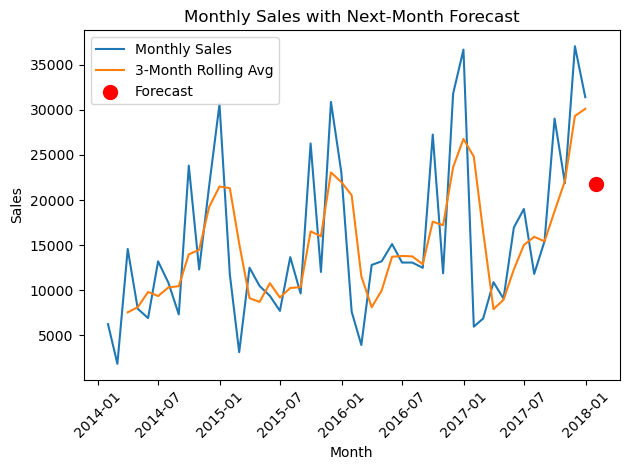

In [5]:
plt.figure()
plt.plot(monthly_sales["order_date"], monthly_sales["sales"], label="Monthly Sales")
plt.plot(monthly_sales["order_date"], monthly_sales["rolling_3_month_avg"], label="3-Month Rolling Avg")

# Next month prediction
next_month_date = monthly_sales["order_date"].max() + pd.DateOffset(months=1)
plt.scatter(next_month_date, predicted_sales, color='red', label='Forecast', s=100)

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales with Next-Month Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
forecast_df = pd.DataFrame({
    "month": [next_month_date],
    "forecast_sales": [predicted_sales]
})

forecast_df.to_csv("../data/processed/next_month_forecast.csv", index=False)
forecast_df


,month,forecast_sales
0,2018-01-31,21766.3


## Forecast Insights

Baseline forecast (6-month average) provides a simple, explainable estimate

Linear regression forecast shows the trend-based estimate for the next month

Both methods are suitable for dashboard KPI visualization

No heavy ML was required, keeping it interpretable